## Identification of all the members of the group.


### GRUPO 5 - Atividade 2 - 09-10-2020


*   Aguimar Ribeiro Júnior - 11516281
*   André Luiz Akabane Solak - 9793572
*   Bruna Bazaluk - 9797002
*   Evandro Nakayama Mota - 10737230
*   Gabriel Bustamante Ferrada Silva - 7629000



## Name of the dataset
Dataset: Wine Reviews

## Abstract
Abstract of the dataset:
The present dataset intends to explore the data of different wines and its features like country, description, price, etc. Originally the author's goal was to make a recommendation system of wines, but here it's only intended to make an statiscal analysis and data exploring.

## Questions to the dataset

1. Qual país tem mais avaliações de seus vinhos?
2. O vinho mais caro é o vinho com a melhor avaliação?
3. Qual o vinho de melhor custo benefício?
4. Quais uvas produzem os vinhos mais caros?
5. Quais sommeliers possuem maior número de avaliações?
6. Quais vinhos têm avaliações, positivas e negativas, parecidas entre
os sommeliers?
7. Quais países têm mais províncias produtoras de vinhos?


## EDA
Present your EDA strategy: Nós fizemos uma análise sucinta dos dados no Setup e focamos em responder as perguntas propostas na atividade anterior.

## Some examples of analysis/visualizations:

1) Present the mean, variance, min, median and max values for each attribute. If the dataset has too many attibutes, choose the more significant ones. Present your code and some remarks to help the understanding.

2) How well distributed are the dataset in relation the each attribute. How can you visually check that? Hint: plot a histogram

3) Is there any attribute that can be used to better interpret the dataset? Show this in a graphic where you used this attribute to group (groupby) the data.

4) Is there any outlier's pattern? 

5) Make your own remarks about the dataset. Try to use one or more graphics to justify your remarks.

6) Is there any symmetry that can be stressed?

7) How important was EDA to help you understand the dataset?

# Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wine_reviews = pd.read_csv('https://raw.githubusercontent.com/aguimarjr/topicos/master/winemag-data-130k-v2.csv')
wine_reviews.head()

Unnamed: 0   country                                        description  \
0           0     Italy  Aromas include tropical fruit, broom, brimston...   
1           1  Portugal  This is ripe and fruity, a wine that is smooth...   
2           2        US  Tart and snappy, the flavors of lime flesh and...   
3           3        US  Pineapple rind, lemon pith and orange blossom ...   
4           4        US  Much like the regular bottling from 2012, this...   

                          designation  points  price           province  \
0                        Vulkà Bianco      87    NaN  Sicily & Sardinia   
1                            Avidagos      87   15.0              Douro   
2                                 NaN      87   14.0             Oregon   
3                Reserve Late Harvest      87   13.0           Michigan   
4  Vintner's Reserve Wild Child Block      87   65.0             Oregon   

              region_1           region_2         taster_name  \
0                 Etna                NaN       Kerin O’Keefe   
1                  NaN                NaN          Roger Voss   
2    Willamette Valley  Willamette Valley        Paul Gregutt   
3  Lake Michigan Shore                NaN  Alexander Peartree   
4    Willamette Valley  Willamette Valley        Paul Gregutt   

  taster_twitter_handle                                              title  \
0          @kerinokeefe                  Nicosia 2013 Vulkà Bianco  (Etna)   
1            @vossroger      Quinta dos Avidagos 2011 Avidagos Red (Douro)   
2           @paulgwine       Rainstorm 2013 Pinot Gris (Willamette Valley)   
3                   NaN  St. Julian 2013 Reserve Late Harvest Riesling ...   
4           @paulgwine   Sweet Cheeks 2012 Vintner's Reserve Wild Child...   

          variety               winery  
0     White Blend              Nicosia  
1  Portuguese Red  Quinta dos Avidagos  
2      Pinot Gris            Rainstorm  
3        Riesling           St. Julian  
4      Pinot Noir         Sweet Cheeks

In [3]:
wine_reviews[['points', 'price']].describe()

points          price
count  129971.000000  120975.000000
mean       88.447138      35.363389
std         3.039730      41.022218
min        80.000000       4.000000
25%        86.000000      17.000000
50%        88.000000      25.000000
75%        91.000000      42.000000
max       100.000000    3300.000000

Note que a distribuição das notas de avaliação possui um desvio padrão de 3.03, enquanto que o preço é 41.02 que é maior que a média.

Text(0.5, 0, 'Pontuação dos vinhos nas avaliações')

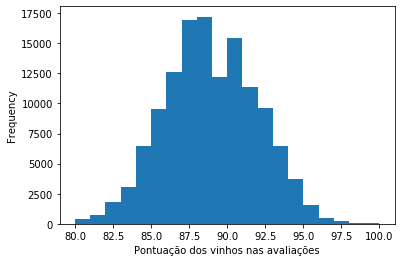

In [4]:
points_hist = wine_reviews['points'].plot.hist(bins=20)
points_hist.set_xlabel('Pontuação dos vinhos nas avaliações')

# 1) Qual país tem mais avaliações de seus vinhos?

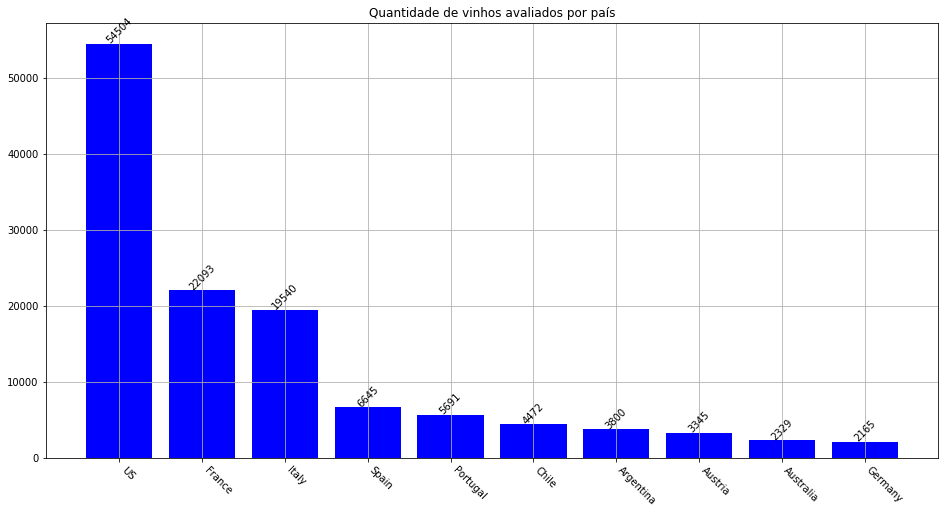

In [5]:
country_reviews = wine_reviews['country'].value_counts()

country_reviews = country_reviews[country_reviews>=2000]

plt.figure(figsize=(16, 8))
plt.bar(x=country_reviews.index, height=country_reviews.values, color='blue')
plt.xticks(rotation=-45, ha='left')

for country in country_reviews.index:
    plt.text(x=country, y=country_reviews[country]+5, 
             s=str(country_reviews[country]), ha='center', rotation=45)

plt.title('Quantidade de vinhos avaliados por país')
plt.grid()
plt.show()

A pergunta original era "Qual o país que mais produz vinho?", porém não se pode concluir sobre o número de vinhos produzidos no país pelo número de reviews no dataset, pois podem existir vinhos que não tem nenhuma avaliação no dataset utilizado. Portanto, a questão foi adaptada para verificar quantos reviews de vinhos produzidos por país existem no dataset. Vê-se no gráfico acima que mais de 40% (41,92%) dos reviews são de vinhos norte-americanos.


# 2) O vinho mais caro é o vinho com a melhor avaliação?

In [6]:
# columns of price and points
price = wine_reviews['price']
points = wine_reviews['points']

In [7]:
most_expensive_wine = wine_reviews[wine_reviews['price'] == price.max()]
best_reviewed_wines = wine_reviews[wine_reviews['points'] == points.max()]

In [8]:
best_reviewed_wines.describe()[['points', 'price']]

points        price
count    19.0    19.000000
mean    100.0   485.947368
std       0.0   410.142451
min     100.0    80.000000
25%     100.0   230.000000
50%     100.0   359.000000
75%     100.0   583.500000
max     100.0  1500.000000

In [9]:
most_expensive_wine

Unnamed: 0 country                                        description  \
80290       80290  France  This ripe wine shows plenty of blackberry frui...   

      designation  points   price  province region_1 region_2 taster_name  \
80290         NaN      88  3300.0  Bordeaux    Médoc      NaN  Roger Voss   

      taster_twitter_handle                                 title  \
80290            @vossroger  Château les Ormes Sorbet 2013  Médoc   

                        variety                    winery  
80290  Bordeaux-style Red Blend  Château les Ormes Sorbet

Os dados acima demonstram que o vinho mais caro custa US\\$3300.00 e possui avaliação de 88 pontos. Logo, ele não está na lista de vinhos com pontuação máxima (100 pontos). É interessante notar também que a média de preço dos vinhos com pontuação máxima é de US\\$485.94, o que nos permite concluir que os vinhos mais bem pontuados são, em média, aproximadamente 6,7 vezes mais baratos que o vinho mais caro do dataset.

# 3) Qual o vinho de melhor custo benefício?

Alguns vinhos têm mais de uma review, então a tabela a seguir considera as médias de preço e pontos de cada vinho.

(O custo benefício é calculado pela diferença entre os pontos e o preço).

In [10]:
#Não estamos considerando vinhos com valores de pontos ou preço nulos
grouped = wine_reviews.groupby('title')
pp=grouped[['points','price','title']].agg(np.mean).dropna() 
pp['custo benefício'] = pp['points']/pp['price']
pp.sort_values(by='custo benefício', ascending=False)

points   price  \
title                                                                
Cramele Recas 2011 UnWineD Pinot Grigio (Viile ...    86.0     4.0   
Dancing Coyote 2015 White (Clarksburg)                85.0     4.0   
Felix Solis 2013 Flirty Bird Syrah (Vino de la ...    85.0     4.0   
Bandit NV Merlot (California)                         85.0     4.0   
Bandit NV Chardonnay (California)                     84.0     4.0   
...                                                    ...     ...   
Domaine du Comte Liger-Belair 2005  La Romanée        96.0  2000.0   
Blair 2013 Roger Rose Vineyard Chardonnay (Arro...    91.0  2013.0   
Château Pétrus 2014  Pomerol                          96.0  2500.0   
Domaine du Comte Liger-Belair 2010  La Romanée        96.0  2500.0   
Château les Ormes Sorbet 2013  Médoc                  88.0  3300.0   

                                                    custo benefício  
title                                                                
Cramele Recas 2011 UnWineD Pinot Grigio (Viile ...        21.500000  
Dancing Coyote 2015 White (Clarksburg)                    21.250000  
Felix Solis 2013 Flirty Bird Syrah (Vino de la ...        21.250000  
Bandit NV Merlot (California)                             21.250000  
Bandit NV Chardonnay (California)                         21.000000  
...                                                             ...  
Domaine du Comte Liger-Belair 2005  La Romanée             0.048000  
Blair 2013 Roger Rose Vineyard Chardonnay (Arro...         0.045206  
Château Pétrus 2014  Pomerol                               0.038400  
Domaine du Comte Liger-Belair 2010  La Romanée             0.038400  
Château les Ormes Sorbet 2013  Médoc                       0.026667  

[110638 rows x 3 columns]

O vinho com melhor custo-benefício portanto é **Cramele Recas 2011 UnWineD Pinot Grigio (Viile Timisului)**.

Para analisar visualmente a diferença entre os custo-benefício

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7febe382bed0>]],
      dtype=object)

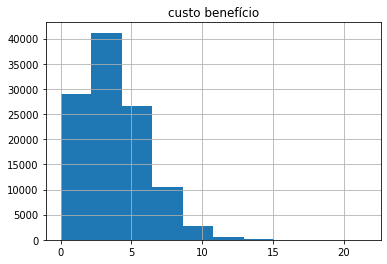

In [11]:
pp.hist('custo benefício')

# 4) Quais uvas produzem os vinhos mais caros?

In [12]:
wr_price = wine_reviews.dropna(subset=['price']) # Apaga os preços que são nulos
wr_price.sort_values(by=['price'], ascending=False)[['price','variety']].head()

price                   variety
80290   3300.0  Bordeaux-style Red Blend
15840   2500.0  Bordeaux-style Red Blend
98380   2500.0                Pinot Noir
120391  2013.0                Chardonnay
113564  2000.0                Pinot Noir


Em preço absoluto, a uva que produz o vinho mais caro é a **Bordeaux-style Red Blend** com um custo de **3300.00**.

In [13]:
wr_groupby_variety = wr_price.groupby(['variety'])[['price']].agg(['count','mean'])
wr_groupby_variety.sort_values(by=[('price','mean')], ascending=False).head()

price            
                 count        mean
variety                           
Ramisco              1  495.000000
Terrantez            1  236.000000
Francisa             1  160.000000
Rosenmuskateller     1  150.000000
Malbec-Cabernet      3  113.333333

Entretanto, se considerarmos a média de cada grupo de uvas, temos que a uva **Ramisco** ganha, com uma média de **495.00**, porém possui apenas 1 avaliação.

Text(0.5, 0, 'Média do preço de um vinho por uva')

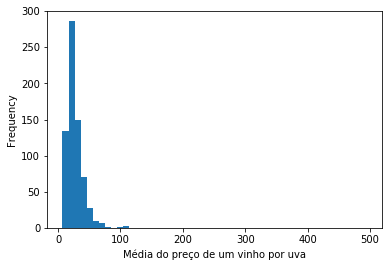

In [14]:
variety_mean_hist = wr_groupby_variety[('price','mean')].plot.hist(bins=50)
variety_mean_hist.set_xlabel('Média do preço de um vinho por uva')

# 5) Quais sommeliers possuem maior número de avaliações?

In [15]:
wine_reviews['taster_name'].value_counts()

Roger Voss            25514
Michael Schachner     15134
Kerin O’Keefe         10776
Virginie Boone         9537
Paul Gregutt           9532
Matt Kettmann          6332
Joe Czerwinski         5147
Sean P. Sullivan       4966
Anna Lee C. Iijima     4415
Jim Gordon             4177
Anne Krebiehl MW       3685
Lauren Buzzeo          1835
Susan Kostrzewa        1085
Mike DeSimone           514
Jeff Jenssen            491
Alexander Peartree      415
Carrie Dykes            139
Fiona Adams              27
Christina Pickard         6
Name: taster_name, dtype: int64

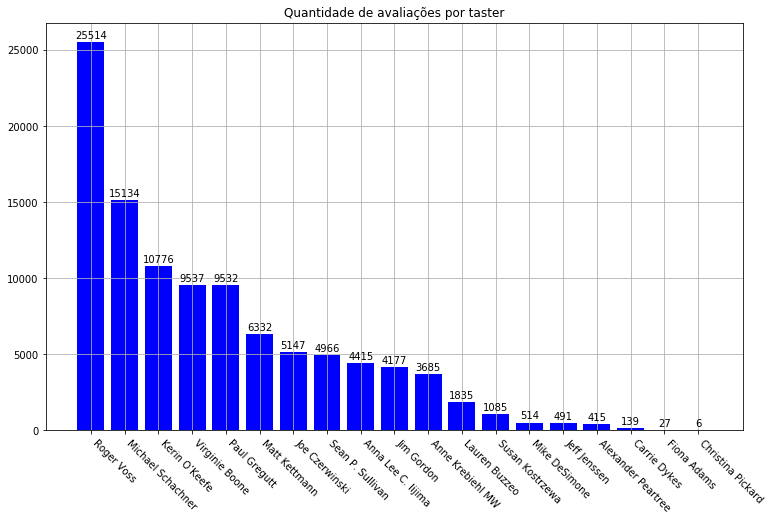

In [16]:
plt.figure(figsize=(12.5, 7.5))
plt.bar(x=wine_reviews['taster_name'].value_counts().index, height=wine_reviews['taster_name'].value_counts().values, color='blue')
plt.xticks(rotation=-45, ha='left')

for taster in wine_reviews['taster_name'].value_counts().index:
    plt.text(x=taster, y=wine_reviews['taster_name'].value_counts()[taster]+250, 
             s=str(wine_reviews['taster_name'].value_counts()[taster]), ha='center')

plt.title('Quantidade de avaliações por taster')
plt.grid()
plt.show()

# 6) Quais vinhos têm avaliações, positivas e negativas, parecidas entre os sommeliers?

In [17]:
wine_reviews[['title', 'variety', 'winery']].drop_duplicates()

title         variety  \
0                       Nicosia 2013 Vulkà Bianco  (Etna)     White Blend   
1           Quinta dos Avidagos 2011 Avidagos Red (Douro)  Portuguese Red   
2           Rainstorm 2013 Pinot Gris (Willamette Valley)      Pinot Gris   
3       St. Julian 2013 Reserve Late Harvest Riesling ...        Riesling   
4       Sweet Cheeks 2012 Vintner's Reserve Wild Child...      Pinot Noir   
...                                                   ...             ...   
129966  Dr. H. Thanisch (Erben Müller-Burggraef) 2013 ...        Riesling   
129967                  Citation 2004 Pinot Noir (Oregon)      Pinot Noir   
129968  Domaine Gresser 2013 Kritt Gewurztraminer (Als...  Gewürztraminer   
129969      Domaine Marcel Deiss 2012 Pinot Gris (Alsace)      Pinot Gris   
129970  Domaine Schoffit 2012 Lieu-dit Harth Cuvée Car...  Gewürztraminer   

                                          winery  
0                                        Nicosia  
1                            Quinta dos Avidagos  
2                                      Rainstorm  
3                                     St. Julian  
4                                   Sweet Cheeks  
...                                          ...  
129966  Dr. H. Thanisch (Erben Müller-Burggraef)  
129967                                  Citation  
129968                           Domaine Gresser  
129969                      Domaine Marcel Deiss  
129970                          Domaine Schoffit  

[119090 rows x 3 columns]


Notamos que cada diferente vinho possui, em geral, apenas uma única avaliação, o que dificulta avaliar a uniformidade de critério entre os tasters. Por isso, optamos por verificar quais vinículas são melhor avaliadas.

A avaliação a seguir indica que a winery 'Williams Selyem' possui a melhor avaliação dentre os vinhos estudados.


In [18]:
winery_reviews = wine_reviews['winery'].value_counts()
winery_reviews = winery_reviews[winery_reviews>=150]

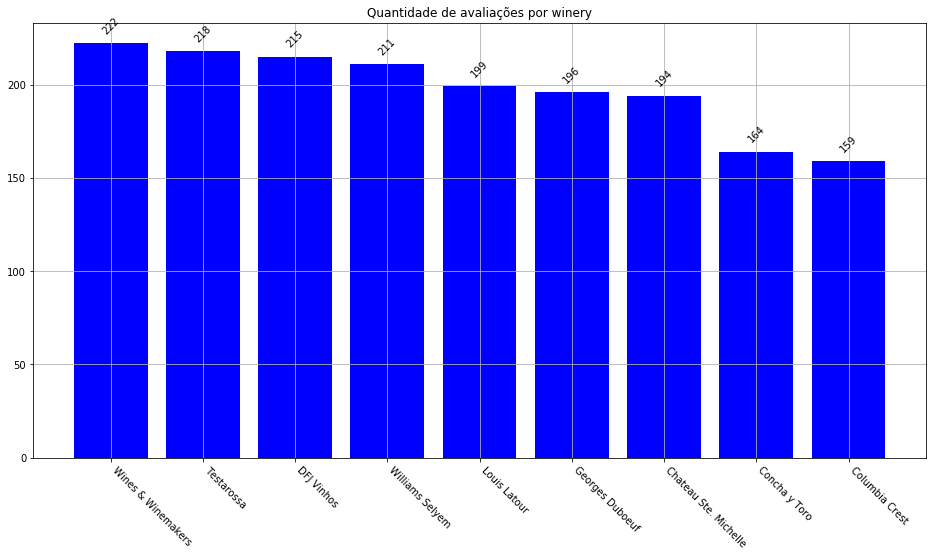

In [19]:
plt.figure(figsize=(16, 8))
plt.bar(x=winery_reviews.index, height=winery_reviews.values, color='blue')
plt.xticks(rotation=-45, ha='left')

for winery in winery_reviews.index:
    plt.text(x=winery, y=winery_reviews[winery]+5, 
             s=str(winery_reviews[winery]), ha='center', rotation=45)

plt.title('Quantidade de avaliações por winery')
plt.grid()
plt.show()

In [20]:
winery_reviews

Wines & Winemakers       222
Testarossa               218
DFJ Vinhos               215
Williams Selyem          211
Louis Latour             199
Georges Duboeuf          196
Chateau Ste. Michelle    194
Concha y Toro            164
Columbia Crest           159
Name: winery, dtype: int64

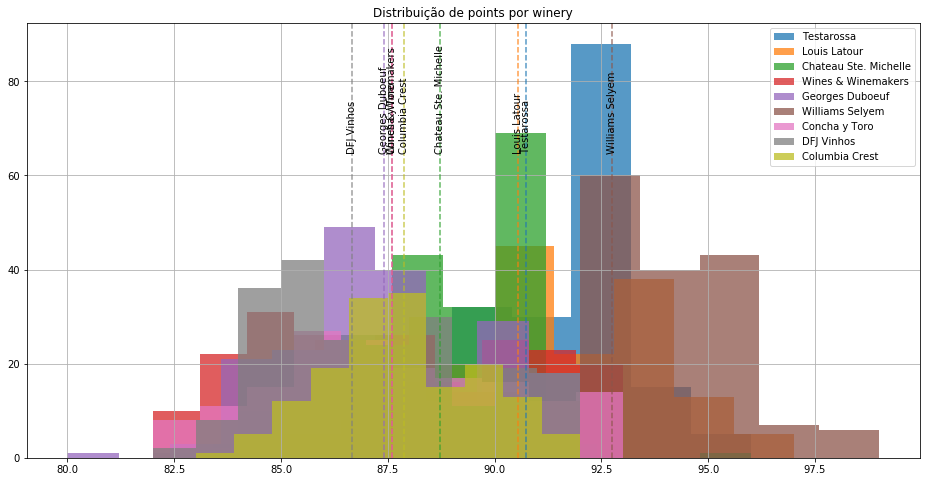

In [21]:
winery_points = wine_reviews.loc[wine_reviews['winery'].isin(winery_reviews.index)]

plt.figure(figsize=(16, 8))
for winery in winery_points['winery'].unique():
    p = plt.hist(winery_points.loc[winery_points['winery']==winery, 'points'], alpha=0.75, label=winery)
    plt.axvline(x=winery_points.loc[winery_points['winery']==winery, 'points'].mean(), ls='--', color=p[2][-1].get_facecolor())
    plt.text(x=winery_points.loc[winery_points['winery']==winery, 'points'].mean(), y=65, 
            s=str(winery), ha='center', rotation=90)

plt.title('Distribuição de points por winery')
plt.legend()
plt.grid()
plt.show()

# 7) Quais países têm mais províncias produtoras de vinhos?

In [22]:
wr_groupby_country_province = wine_reviews.groupby(['country','province']).count().reset_index()
wr_groupby_country = wr_groupby_country_province.groupby('country')['province'].count().reset_index()
wr_groupby_country.sort_values(by=['province'], ascending=False).head()

country  province
18        Greece        54
8          Chile        43
36  South Africa        42
31      Portugal        40
40            US        27

Segundo esse dataset, a Grécia possui **54** províncias produtoras de vinhos.

Text(0.5, 0, 'Número de províncias em cada país')

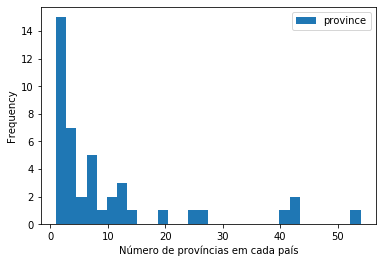

In [23]:
wr_province_hist = wr_groupby_country.plot.hist(bins=30)
wr_province_hist.set_xlabel('Número de províncias em cada país')